In [163]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, svm, model_selection
#Importing the necessary libraries
from scipy.linalg import eigh
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [145]:
import os

# Current working directory
current_directory = os.getcwd()

print("Current Working Directory:", current_directory)


Current Working Directory: /Users/akin/Desktop/MLSL2


In [146]:
import os

# Directory to change to
new_directory = '/Users/akin/Desktop/MLSL2'

# Change the current working directory
os.chdir(new_directory)

# Get current working directory
current_directory = os.getcwd()
print("Current Working Directory:", current_directory)


Current Working Directory: /Users/akin/Desktop/MLSL2


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

def create_train_test_data(full_df, class1, class2, test_size=0.35, random_state=42):
    # Filter the dataset for class1 and class2
    class1_data = full_df[full_df['label'] == class1]
    class2_data = full_df[full_df['label'] == class2]
    
    # Combine the filtered data for class1 and class2
    filtered_data = pd.concat([class1_data, class2_data])
    
    # Extract features (X) and labels (y)
    X = filtered_data.drop(columns=['label']).values
    y = filtered_data['label'].values
    
    # Perform the train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    return X_train, X_test, y_train, y_test

# Usage
class1 = 0
class2 = 1

# Call the function to create the train-test data
X_train, X_test, y_train, y_test = create_train_test_data(full_df, class1, class2)

# Print the train-test data
print("X_train:", X_train)
print("X_test:", X_test)
print("y_train:", y_train)
print("y_test:", y_test)


In [149]:
# Loading the Digit Recognizer dataset train.csv
full_df = pd.read_csv('train.csv')
print(full_df)


       label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0          1       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          1       0       0       0       0       0       0       0       0   
3          4       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995      0       0       0       0       0       0       0       0       0   
41996      1       0       0       0       0       0       0       0       0   
41997      7       0       0       0       0       0       0       0       0   
41998      6       0       0       0       0       0       0       0       0   
41999      9       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775 

## Question 1

In [53]:
# Selecting two classes
class1 = 0
class2 = 1

# Filtering the dataset for class1 and class2 from Full dataset
class1_data = full_df[full_df['label'] == class1]
class2_data = full_df[full_df['label'] == class2]


In [54]:
print(class1_data, class2_data)

       label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
1          0       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
5          0       0       0       0       0       0       0       0       0   
17         0       0       0       0       0       0       0       0       0   
23         0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
41930      0       0       0       0       0       0       0       0       0   
41968      0       0       0       0       0       0       0       0       0   
41986      0       0       0       0       0       0       0       0       0   
41988      0       0       0       0       0       0       0       0       0   
41995      0       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775 

In [55]:
# Combine the filtered data for class1 and class2
filtered_data = pd.concat([class1_data, class2_data])

print(filtered_data)

       label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
1          0       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
5          0       0       0       0       0       0       0       0       0   
17         0       0       0       0       0       0       0       0       0   
23         0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
41952      1       0       0       0       0       0       0       0       0   
41954      1       0       0       0       0       0       0       0       0   
41960      1       0       0       0       0       0       0       0       0   
41991      1       0       0       0       0       0       0       0       0   
41996      1       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775 

In [56]:

# Extract features (X) and labels (y)
X = filtered_data.drop(columns=['label']).values
y = filtered_data['label'].values

print(X, y)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] [0 0 0 ... 1 1 1]


In [57]:

# Perform the train-test split (65% training, 35% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

In [58]:
# Initialize lists to store results
train_accuracies_linear = []
test_accuracies_linear = []
support_vectors_linear = []

train_accuracies_poly = []
test_accuracies_poly = []
support_vectors_poly = []

train_accuracies_rbf = []
test_accuracies_rbf = []
support_vectors_rbf = []

In [41]:
# Loop through different C values for Linear SVM 1 to 50 with difference as 2
c_values = list(range(1, 51, 2))
print(c_values)
for C in c_values:
    # Create and fit a Linear SVM classifier
    svm_linear = SVC(kernel='linear', C=C)
    svm_linear.fit(X_train, y_train)
    
    # Predict on the training and test data
    y_train_pred = svm_linear.predict(X_train)
    y_test_pred = svm_linear.predict(X_test)
    
    # Calculate accuracies and number of support vectors
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    num_support_vectors = len(svm_linear.support_)
    
    train_accuracies_linear.append(train_accuracy)
    test_accuracies_linear.append(test_accuracy)
    support_vectors_linear.append(num_support_vectors)


[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]


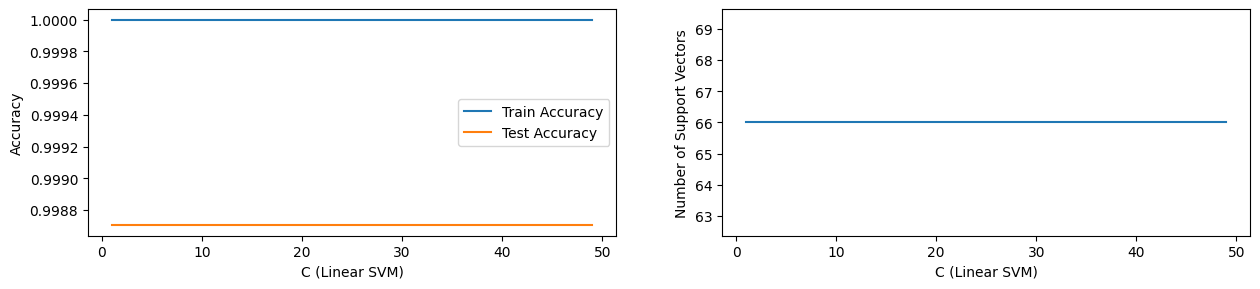

In [42]:
# Plot the results
plt.figure(figsize=(15, 10))

plt.subplot(3, 2, 1)
plt.plot(c_values, train_accuracies_linear, label='Train Accuracy')
plt.plot(c_values, test_accuracies_linear, label='Test Accuracy')
plt.xlabel('C (Linear SVM)')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(3, 2, 2)
plt.plot(c_values, support_vectors_linear)
plt.xlabel('C (Linear SVM)')
plt.ylabel('Number of Support Vectors')
plt.show()

In [43]:
# Loop through different degrees for Polynomial SVM
degrees = [2, 3, 4, 5]
for d in degrees:
    # Create and fit a Polynomial SVM classifier
    svm_poly = SVC(kernel='poly', degree=d, C=10)
    svm_poly.fit(X_train, y_train)
    
    # Predict on the training and test data
    y_train_pred = svm_poly.predict(X_train)
    y_test_pred = svm_poly.predict(X_test)
    
    # Calculate accuracies and number of support vectors
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    num_support_vectors = len(svm_poly.support_)
    
    train_accuracies_poly.append(train_accuracy)
    test_accuracies_poly.append(test_accuracy)
    support_vectors_poly.append(num_support_vectors)


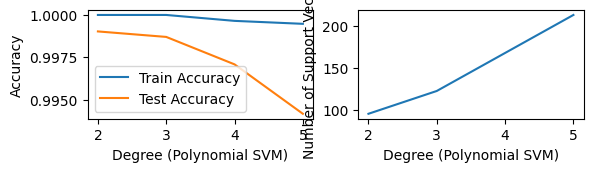

In [16]:
plt.subplot(3, 2, 3)
plt.plot(degrees, train_accuracies_poly, label='Train Accuracy')
plt.plot(degrees, test_accuracies_poly, label='Test Accuracy')
plt.xlabel('Degree (Polynomial SVM)')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(3, 2, 4)
plt.plot(degrees, support_vectors_poly)
plt.xlabel('Degree (Polynomial SVM)')
plt.ylabel('Number of Support Vectors')
plt.show()

In [62]:
# Loop through different sigma values for RBF SVM
sigmas = list(range(1, 11))
for sigma in sigmas:
    # Create and fit an RBF SVM classifier
    svm_rbf = SVC(kernel='rbf', gamma=sigma)
    svm_rbf.fit(X_train, y_train)
    
    # Predict on the training and test data
    y_train_pred = svm_rbf.predict(X_train)
    y_test_pred = svm_rbf.predict(X_test)
    
    # Calculate accuracies and number of support vectors
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    num_support_vectors = len(svm_rbf.support_)
    
    train_accuracies_rbf.append(train_accuracy)
    test_accuracies_rbf.append(test_accuracy)
    support_vectors_rbf.append(num_support_vectors)


KeyboardInterrupt: 

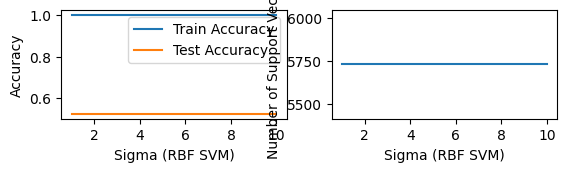

In [18]:
plt.subplot(3, 2, 5)
plt.plot(sigmas, train_accuracies_rbf, label='Train Accuracy')
plt.plot(sigmas, test_accuracies_rbf, label='Test Accuracy')
plt.xlabel('Sigma (RBF SVM)')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(3, 2, 6)
plt.plot(sigmas, support_vectors_rbf)
plt.xlabel('Sigma (RBF SVM)')
plt.ylabel('Number of Support Vectors')

plt.show()


In [59]:
sigmas = list(range(1, 11))
c_values = list(range(1, 51, 2))

In [61]:
for sigma in sigmas:
    # Loop through different C values
    for C in c_values:
        # Create and fit an RBF SVM classifier
        
        print("Sigma = ", sigma,"C value = ",C)
        svm_rbf = SVC(kernel='rbf', gamma=sigma, C=C)
        svm_rbf.fit(X_train, y_train)

        # Predict on the training and test data
        y_train_pred = svm_rbf.predict(X_train)
        y_test_pred = svm_rbf.predict(X_test)

        # Calculate accuracies and number of support vectors
        train_accuracy = accuracy_score(y_train, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        num_support_vectors = len(svm_rbf.support_)
        print("train_accuracy = ",train_accuracy , "test_accuracy : ",test_accuracy)
        # Append the accuracies and support vectors for this combination of sigma and C
        train_accuracies_rbf.append(train_accuracy)
        test_accuracies_rbf.append(test_accuracy)
        support_vectors_rbf.append(num_support_vectors)

# Reshape the data for plotting
train_accuracies_rbf = np.array(train_accuracies_rbf).reshape(len(sigmas), len(c_values))
test_accuracies_rbf = np.array(test_accuracies_rbf).reshape(len(sigmas), len(c_values))

# Plotting
plt.figure(figsize=(12, 6))
for i, sigma in enumerate(sigmas):
    plt.plot(c_values, train_accuracies_rbf[i], label=f'Training Accuracy (Sigma={sigma})')
    plt.plot(c_values, test_accuracies_rbf[i], label=f'Test Accuracy (Sigma={sigma})')

plt.xlabel('C Value')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracies for RBF SVM with Different Sigmas')
plt.legend()
plt.grid(True)
plt.show()

Sigma =  1 C value =  1
train_accuracy =  1.0 test_accuracy :  0.5246273493195075
Sigma =  1 C value =  3
train_accuracy =  1.0 test_accuracy :  0.5246273493195075
Sigma =  1 C value =  5
train_accuracy =  1.0 test_accuracy :  0.5246273493195075
Sigma =  1 C value =  7
train_accuracy =  1.0 test_accuracy :  0.5246273493195075
Sigma =  1 C value =  9
train_accuracy =  1.0 test_accuracy :  0.5246273493195075
Sigma =  1 C value =  11
train_accuracy =  1.0 test_accuracy :  0.5246273493195075
Sigma =  1 C value =  13
train_accuracy =  1.0 test_accuracy :  0.5246273493195075
Sigma =  1 C value =  15
train_accuracy =  1.0 test_accuracy :  0.5246273493195075
Sigma =  1 C value =  17
train_accuracy =  1.0 test_accuracy :  0.5246273493195075
Sigma =  1 C value =  19
train_accuracy =  1.0 test_accuracy :  0.5246273493195075
Sigma =  1 C value =  21
train_accuracy =  1.0 test_accuracy :  0.5246273493195075
Sigma =  1 C value =  23
train_accuracy =  1.0 test_accuracy :  0.5246273493195075
Sigma =  

KeyboardInterrupt: 

## Question 2

In [19]:
#function to compute random forest
def train_and_evaluate_rf(X_train, X_test, y_train, y_test, num_trees, max_depths):
    train_accuracies = []
    test_accuracies = []

    for max_depth in max_depths:
        train_accuracy_row = []
        test_accuracy_row = []

        for num_tree in num_trees:
            # Create a Random Forest classifier with the specified number of trees and max depth
            clf = RandomForestClassifier(n_estimators=num_tree, max_depth=max_depth, random_state=42)

            # Train the classifier on the training data
            clf.fit(X_train, y_train)

            # Calculate training accuracy
            train_accuracy = clf.score(X_train, y_train)
            train_accuracy_row.append(train_accuracy)

            # Calculate test accuracy
            test_accuracy = clf.score(X_test, y_test)
            test_accuracy_row.append(test_accuracy)

        train_accuracies.append(train_accuracy_row)
        test_accuracies.append(test_accuracy_row)

    return train_accuracies, test_accuracies


In [20]:
# Main code
num_trees = list(range(5, 101, 5))
max_depths = list(range(2, 9))

train_accuracies, test_accuracies = train_and_evaluate_rf(X_train, X_test, y_train, y_test, num_trees, max_depths)
print("----train_accuracies---")
print(train_accuracies)
print("----test_accuracies---")
print(test_accuracies)


----train_accuracies---
[[0.9972076788830716, 0.9972076788830716, 0.9970331588132635, 0.9973821989528796, 0.9968586387434555, 0.9973821989528796, 0.9982547993019197, 0.9975567190226876, 0.9977312390924956, 0.9975567190226876, 0.9977312390924956, 0.9980802792321117, 0.9973821989528796, 0.9973821989528796, 0.9977312390924956, 0.9973821989528796, 0.9973821989528796, 0.9977312390924956, 0.9975567190226876, 0.9977312390924956], [0.9956369982547993, 0.9975567190226876, 0.9979057591623036, 0.9980802792321117, 0.9984293193717277, 0.9986038394415357, 0.9982547993019197, 0.9984293193717277, 0.9984293193717277, 0.9986038394415357, 0.9986038394415357, 0.9986038394415357, 0.9987783595113437, 0.9987783595113437, 0.9986038394415357, 0.9986038394415357, 0.9986038394415357, 0.9989528795811519, 0.9989528795811519, 0.9989528795811519], [0.9986038394415357, 0.9984293193717277, 0.9989528795811519, 0.9993019197207679, 0.9993019197207679, 0.9993019197207679, 0.9993019197207679, 0.9993019197207679, 0.99912739

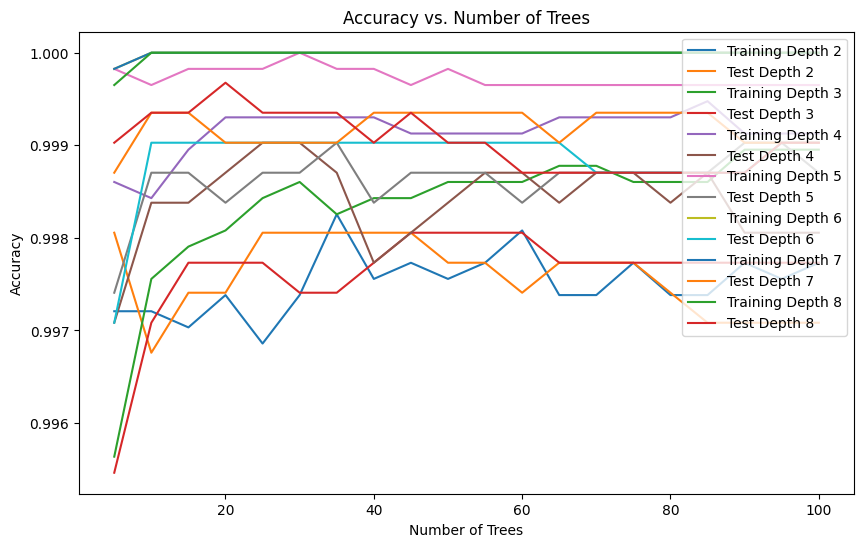

In [45]:
plt.figure(figsize=(10, 6))
for i, max_depth in enumerate(max_depths):
    plt.plot(num_trees, train_accuracies[i], label=f'Training Depth {max_depth}')
    plt.plot(num_trees, test_accuracies[i], label=f'Test Depth {max_depth}')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.title(f'Accuracy vs. Number of Trees')
plt.show()


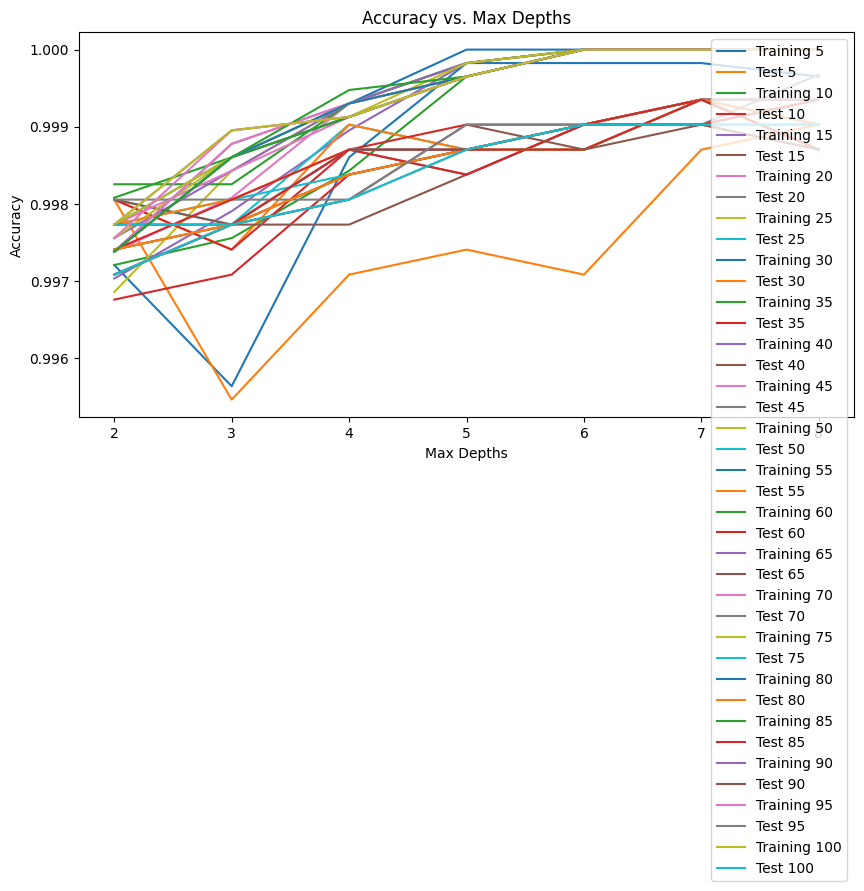

In [22]:
plt.figure(figsize=(10, 5))
for i, num_tree in enumerate(num_trees):	
        plt.plot(max_depths, [train_accuracies[j][i] for j in range(len(max_depths))], label=f'Training {num_tree}')	
        plt.plot(max_depths, [test_accuracies[j][i] for j in range(len(max_depths))], label=f'Test {num_tree}')
plt.xlabel('Max Depths')
plt.ylabel('Accuracy')
plt.legend()
plt.title(f'Accuracy vs. Max Depths')
plt.show()


## Question 3

In [23]:
# Constants
C_value = 1.0  # Constant C value for the SVM classifier

# Initialize lists to store accuracy for each target class
accuracy_per_class = []

# Iterate through each target class (0 to 9)
for target_class in range(10):
    # Choose target and background classes
    background_classes = [c for c in range(10) if c != target_class]

    # Separate target class and background class data
    target_data = full_df[full_df['label'] == target_class]
    background_data = full_df[full_df['label'].isin(background_classes)]

    # Sample 20% data from each background class
    background_sampled = background_data.groupby('label').apply(lambda x: x.sample(frac=0.2))

    # Combine the target data and the sampled background data
    final_data = pd.concat([target_data, background_sampled])

    # Split into features (X) and target labels (y)
    X = final_data.drop('label', axis=1)
    y = final_data['label']

    # Split into training and validation sets
    X_train, X_val, y_train, y_val = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

    # Build Linear SVM classifier
    svm_classifier = svm.SVC(kernel='linear', C=C_value)
    svm_classifier.fit(X_train, y_train)

    # Calculate validation accuracy
    val_accuracy = svm_classifier.score(X_val, y_val)
    accuracy_per_class.append(val_accuracy)




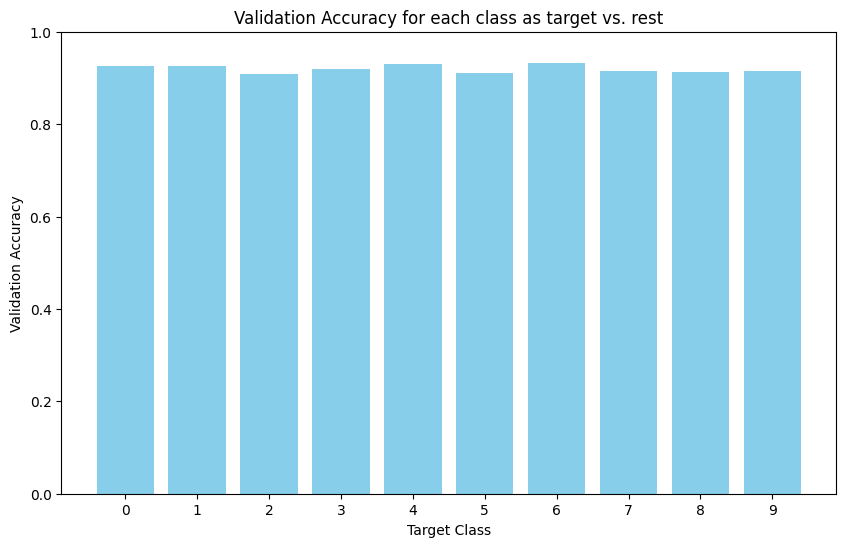

In [24]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(10), accuracy_per_class, color='skyblue')
plt.xlabel('Target Class')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy for each class as target vs. rest')
plt.xticks(range(10))
plt.ylim(0, 1.0)
plt.show()

# Question 4

In [90]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


In [199]:
class_pairs = []
for class1 in range(10):
    for class2 in range(class1 + 1, 10):
        class_pairs.append((class1, class2))

# Print the class pairs
print("Class Pairs:", class_pairs)

Class Pairs: [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (5, 6), (5, 7), (5, 8), (5, 9), (6, 7), (6, 8), (6, 9), (7, 8), (7, 9), (8, 9)]


In [200]:
# Split the dataset randomly into 65% training and 35% test data
features = full_df.drop("label", axis=1).values
labels = full_df["label"].values

#Using StandardScaler to scale the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(scaled_features, labels, test_size=0.35, random_state=42)

# Create an empty file to store the results
output_file = open("pairwise_class_accuracy.csv", "w")
output_file.write("Class-1,Class-2,Validation-Set-Accuracy\n")


40

In [201]:
# Defining a standard epsilon value to avoid division by zero for Fisher 
epsilon = 1e-8

In [202]:
# Dictionary to store LDA models for each class pair
lda_models = {}  
val_accuracies = []

for idx, class_pair in enumerate(class_pairs):
    
    # Select the data for the current pair of classes
    mask = (y_train == class_pair[0]) | (y_train == class_pair[1])
    data = X_train[mask]
    labels = y_train[mask]

    # Calculate class means for each class subset
    mean1 = np.mean(data[labels == class_pair[0]], axis=0)
    mean2 = np.mean(data[labels == class_pair[1]], axis=0)

    # Calculate the within-class scatter matrix (Sw)
    cov1 = np.cov(data[labels == class_pair[0]].T)
    cov2 = np.cov(data[labels == class_pair[1]].T)
    Sw = cov1 + cov2

    # Calculate the between-class scatter matrix (Sb)
    Sb = np.outer(mean1 - mean2, mean1 - mean2)

    # Calculate the Fisher Discriminant matrix (W)
    eigenvalues, eigenvectors = eigh(np.linalg.pinv(Sw).dot(Sb))
    sorted_indices = np.argsort(eigenvalues)[::-1]  # Sort eigenvalues in descending order
    W = eigenvectors[:, sorted_indices[:30]]  # Choose the top 30 discriminant vectors
    # Project the data onto the Fisher Discriminant vectors
    fisher_features = class_features.dot(W) / (np.linalg.norm(W, axis=0) + epsilon)
    
    # Project the data onto the Fisher Discriminant vectors
    data_fisher = data.dot(W)

    # Standardize the features
    scaler = StandardScaler()
    data_fisher = scaler.fit_transform(data_fisher)

    # Fit a Linear SVM classifier
    C = 1.0  # You can adjust this constant if needed
    svm_classifier = SVC(kernel='linear', C=C)
    svm_classifier.fit(data_fisher, labels)

    # Select the test data for the current pair of classes
    mask = (y_test == class_pair[0]) | (y_test == class_pair[1])
    test_data = X_test[mask]
    test_labels = y_test[mask]

    # Apply the same feature projection and standardization to the test data
    test_data_fisher = test_data.dot(W)
    test_data_fisher = scaler.transform(test_data_fisher)

    # Predict on the test set
    test_pred = svm_classifier.predict(test_data_fisher)

    # Calculate the validation accuracy
    val_accuracy = accuracy_score(test_labels, test_pred)
    val_accuracies.append(val_accuracy)

    # Store the LDA model for this class pair
    lda_models[class_pair] = fisher_features

    # Write the results to the output file
    output_file.write(f"{class_pair[0]},{class_pair[1]},{val_accuracy}\n")

# Close the output file
output_file.close()




In [203]:
# Define a threshold to classify pairs as "difficult" or "easy" based on accuracy
threshold = 0.96  # Adjust the threshold as needed

# Analyze validation set accuracy to identify "difficult" vs. "easy" pairs to classify
difficult_pairs = []
easy_pairs = []

for idx, (class1, class2) in enumerate(class_pairs):
    accuracy = val_accuracies[idx]  # Get the accuracy for this class pair
    if accuracy < threshold:
        difficult_pairs.append((class1, class2))
    else:
        easy_pairs.append((class1, class2))

print("Difficult Pairs (accuracy < threshold):", difficult_pairs)
print("Easy Pairs (accuracy >= threshold):", easy_pairs)


Difficult Pairs (accuracy < threshold): [(3, 5), (4, 9), (5, 8), (7, 9)]
Easy Pairs (accuracy >= threshold): [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (3, 4), (3, 6), (3, 7), (3, 8), (3, 9), (4, 5), (4, 6), (4, 7), (4, 8), (5, 6), (5, 7), (5, 9), (6, 7), (6, 8), (6, 9), (7, 8), (8, 9)]


In [205]:
# Print Fisher dimensions for each class pair
for class_pair, fisher_features in lda_models.items():
    print(f"\nComparison of Fisher dimensions for classes {class_pair[0]} and {class_pair[1]}:")
    print(fisher_features[:, :30].flatten() )  # Print the top 30 Fisher dimensions for class1



Comparison of Fisher dimensions for classes 0 and 1:
[ 3.83703193  3.52668699 -0.42561283 ... -0.48955512 -2.3917333
  1.44436035]

Comparison of Fisher dimensions for classes 0 and 2:
[-2.77463335 -0.03490504  0.27998477 ... -0.35167042  1.3585059
 -1.09477501]

Comparison of Fisher dimensions for classes 0 and 3:
[ 2.608218   -1.0989393   0.88465815 ... -1.16434776 -0.05682654
 -1.9878099 ]

Comparison of Fisher dimensions for classes 0 and 4:
[-1.80311034 -1.70501576 -0.10344024 ... -4.19858917 -2.88446149
 -2.31828933]

Comparison of Fisher dimensions for classes 0 and 5:
[-2.3356009   2.23733872  0.6596619  ...  1.33334783  0.67499812
  2.20073599]

Comparison of Fisher dimensions for classes 0 and 6:
[-0.98731271 -0.18840627 -0.78269562 ... -0.71252698  0.38157382
 -0.14344319]

Comparison of Fisher dimensions for classes 0 and 7:
[ 0.92256187  0.00333288 -0.89149614 ...  0.73915198 -0.33729602
 -1.7474386 ]

Comparison of Fisher dimensions for classes 0 and 8:
[ 3.46280096  1.2